In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, time, sys, random,math

In [2]:
# read us-cities-top-1k.csv
df = pd.read_csv('us-cities-top-1k.csv') # cols = ['City', 'State', 'Population', 'lat', 'lon']
# sort by population
df = df.sort_values(by='Population', ascending=False)

# only keep top 100 cities
# df = df.head(20)

In [3]:
# print to cities.txt:
# id, lat, lon, population
with open('cities.txt', 'w') as f:
    for idx, (i, row) in enumerate(df.iterrows()):
        f.write(f'{idx+1} {row["lat"]:.2f} {row["lon"]:.2f} {row["Population"]} {row["City"].replace(" ", "_")}\n')
        if idx > 10000:
            break

In [ ]:
# 

In [385]:
G = nx.Graph()

for a in range(0, len(df)):
    for b in range(a + 1, len(df)):
        # get distance between cities a and b
        lat1 = df.iloc[a]["lat"]
        lon1 = df.iloc[a]["lon"]
        lat2 = df.iloc[b]["lat"]
        lon2 = df.iloc[b]["lon"]
        dist = np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)
        pop_a = df.iloc[a]["Population"]
        pop_b = df.iloc[b]["Population"]
        harmonic_mean = 2 * (pop_a * pop_b) / (pop_a + pop_b)
        G.add_edge(df.iloc[a]["City"], df.iloc[b]["City"], weight=dist, harmonic_mean=harmonic_mean)


# only keep the 100 shortest edges while still keeping the graph connected
def prune_graph(G, n):
    # Ensure the graph is connected by finding the minimum spanning tree (MST)
    T = nx.minimum_spanning_tree(G)

    # If the MST has more than n edges, trim it to have exactly n edges
    if T.size() > n:
        raise ValueError("The minimum spanning tree has more edges than the desired number of edges")

    # Add the rest of the edges in order of increasing weight until we have n edges
    edges = sorted(G.edges(data=True), key=lambda x: x[2]["weight"])
    T_edges = set(T.edges())

    for edge in edges:
        if T.size() >= n:
            break
        if (edge[0], edge[1]) not in T_edges and (edge[1], edge[0]) not in T_edges:
            T.add_edge(edge[0], edge[1], weight=edge[2]["weight"])

    return T


# # Prune graph based on harmonic mean of populations
# def prune_graph(G, n):
#     # Ensure the graph is connected by finding the minimum spanning tree (MST)
#     T = nx.minimum_spanning_tree(G)

#     # Sort edges by harmonic mean in descending order
#     edges = sorted(G.edges(data=True), key=lambda x: x[2]["harmonic_mean"], reverse=True)

#     # Add the highest harmonic mean edges to the MST until we have n edges
#     T_edges = set(T.edges())
#     for u, v, data in edges:
#         if T.size() >= n:
#             break
#         if (u, v) not in T_edges and (v, u) not in T_edges:
#             T.add_edge(u, v, weight=data["weight"], harmonic_mean=data["harmonic_mean"])

#     return T


G = prune_graph(G, 40)

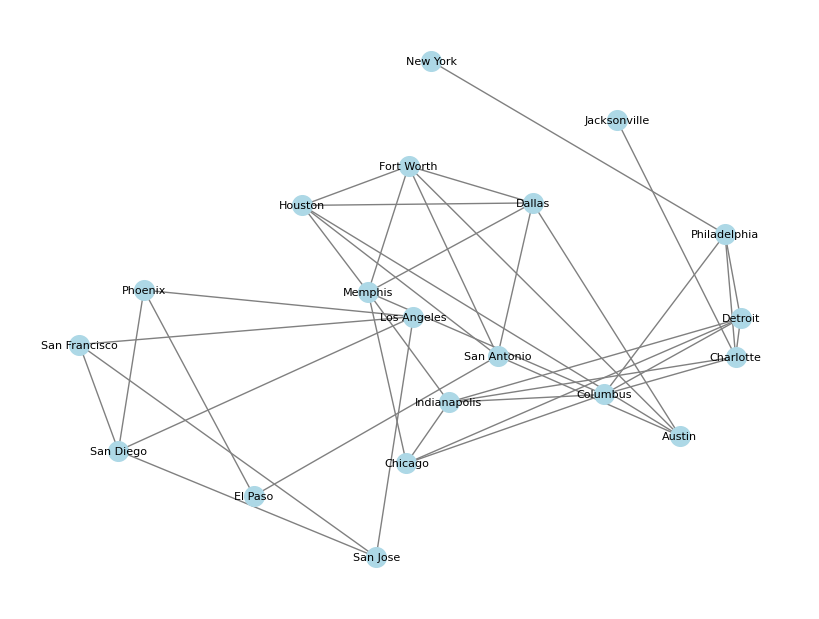

In [390]:
# plot graph
def plot_graph(G,kf=10):
    """
    Plots a weighted graph with distances between nodes proportional to edge weights.
    
    Parameters:
    G (networkx.Graph): A weighted graph where edge weights determine the distance between nodes.
    rounding_digits (int): Number of decimal places to round the edge weights for display.
    """
    # Calculate positions for nodes using spring layout with weights
    pos = nx.spring_layout(G, weight='weight', iterations=100, seed = 42,k=kf/math.sqrt(G.order()))
    
    # Draw the graph with node labels and edge weights
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=8, font_color='black', edge_color='gray')
    
    plt.show()


plot_graph(G,20)

In [388]:
nx.shortest_path(G, source='New York', target='Los Angeles', weight='weight')

['New York',
 'Philadelphia',
 'Columbus',
 'Memphis',
 'Houston',
 'San Antonio',
 'El Paso',
 'Phoenix',
 'Los Angeles']

In [ ]:
# Genetic algorithm to generate TSP

In [1]:
a=list(range(10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
a[-1:]